In [135]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

In [136]:
df_origin = pd.read_csv('../data/data_vacancies.csv')
df_origin = df_origin.drop(['id',
         'salary_pay_type',
         'offer_education_id',
         'education_is_base',
         'education_order_num',
         'list_regions',
         'tags_id'], axis=1)
df_origin.city_id = df_origin.city_id.apply(lambda x: str(x))
df_origin.head()

,custom_position,schedule,salary_from,salary_to,education_name,city_id,work_skills
0,Сварщик-сборщик,полный рабочий день,60000,120000,любое,2,"['сварочные работы', 'сборка изделий по чертеж..."
1,Сварщик-монтажник,полный рабочий день,60000,120000,любое,2,"['монтажные работы', 'строительные работы', 'э..."
2,Слесарь-сборщик,полный рабочий день,60000,80000,любое,2,"['работа на фрезерных станках', 'слесарный рем..."
3,Грузчик-упаковщик,частичная занятость,30000,35000,любое,1,"['комплектация товара', 'маркировка', 'стрессо..."
4,Грузчик-упаковщик,частичная занятость,30000,35000,любое,57,"['маркировка', 'стрессоустойчивость', 'погрузо..."


In [137]:
df_trud = pd.read_csv('../data/3000vac.csv')
df_trud = df_trud.drop('Unnamed: 0', axis=1)
df_trud.head()

,job-name,schedule,employment,education,experience,location,salary_max,salary_min
0,Уборщик производственных и служебных помещений...,Неполный рабочий день,Частичная занятость,Не указано,0,Смоленская область,0,23102
1,Менеджер (удаленная работа),Гибкий график,Удаленная,Среднее,0,Волгоградская область,30000,30000
2,Менеджер (удаленная работа),Гибкий график,Удаленная,Среднее,0,Мордовия республика,30000,30000
3,Менеджер (удаленная работа),Гибкий график,Удаленная,Среднее,0,Белгородская область,30000,30000
4,Менеджер (удаленная работа),Гибкий график,Удаленная,Среднее,0,Пермский край,30000,30000


Хочется отметить, что на `trudvsem` не было возможности собрать информацию по скилам, поэтому ее придется выбросить из рассмотрения. Также видно, что я собрал немного лишней информации, например, `employment`, `experience`. Эту информацию исключим из рассмотрения. Столбцы переименуем, посмотрим на сходства категориальных признаков. 

In [138]:
df_trud.employment.value_counts()

employment
Полная занятость       3066
Частичная занятость     133
Временная                70
Удаленная                50
Сезонная                  8
Стажировка                3
Name: count, dtype: int64

In [139]:
df_trud[df_trud.employment == 'Частичная занятость'].schedule.value_counts()

schedule
Неполный рабочий день           111
Гибкий график                    12
Сменный график                    5
Полный рабочий день               3
Ненормированный рабочий день      2
Name: count, dtype: int64

In [140]:
df_origin = df_origin.drop('work_skills', axis=1)
df_trud = df_trud.drop(['employment', 'experience'], axis=1)

In [141]:
column_mapping = {
    'job-name': 'custom_position',
    'education': 'education_name',
    'location': 'city_id',
    'salary_max': 'salary_to',
    'salary_min': 'salary_from'
}

df_trud.rename(columns=column_mapping, inplace=True)

In [142]:
print(df_trud.schedule.value_counts())
print(df_origin.schedule.value_counts())

schedule
Полный рабочий день             2155
Сменный график                   631
Вахтовый метод                   188
Неполный рабочий день            167
Гибкий график                    153
Ненормированный рабочий день      36
Name: count, dtype: int64
schedule
полный рабочий день    7462
сменный график         6126
удаленная работа       2986
свободный график       1327
вахта                  1302
частичная занятость     286
Name: count, dtype: int64


In [143]:
schedule_mapping = {
    'Полный рабочий день': 'полный рабочий день',
    'Сменный график': 'сменный график',
    'Вахтовый метод': 'вахта',
    'Неполный рабочий день': 'частичная занятость',
    'Гибкий график': 'свободный график',
    'Ненормированный рабочий день': 'ненормированный рабочий день',
}

In [144]:
df_trud.schedule = df_trud.schedule.apply(lambda x: schedule_mapping[x])

In [145]:
print(df_trud.education_name.value_counts())
print(df_origin.education_name.value_counts())

education_name
Не указано                  1568
Среднее профессиональное     708
Высшее                       633
Среднее                      373
Незаконченное высшее          26
Среднее общее                 18
Основное общее                 4
Name: count, dtype: int64
education_name
любое                       16740
среднее профессиональное     1168
высшее                        924
среднее                       577
неполное высшее                80
Name: count, dtype: int64


In [146]:
education_mapping = {
    'Не указано': 'любое',
    'Среднее профессиональное': 'среднее профессиональное',
    'Высшее': 'высшее',
    'Среднее': 'среднее',
    'Незаконченное высшее': 'неполное высшее',
    'Среднее общее': 'Любое',
    'Основное общее': 'Любое',
}
df_trud.education_name = df_trud.education_name.apply(lambda x: education_mapping[x])

In [147]:
df_trud.loc[df_trud['salary_to'] < df_trud['salary_from'], 'salary_to'] = df_trud['salary_from']
df_trud.head()

,custom_position,schedule,education_name,city_id,salary_to,salary_from
0,Уборщик производственных и служебных помещений...,частичная занятость,любое,Смоленская область,23102,23102
1,Менеджер (удаленная работа),свободный график,среднее,Волгоградская область,30000,30000
2,Менеджер (удаленная работа),свободный график,среднее,Мордовия республика,30000,30000
3,Менеджер (удаленная работа),свободный график,среднее,Белгородская область,30000,30000
4,Менеджер (удаленная работа),свободный график,среднее,Пермский край,30000,30000


In [148]:
df_origin.head()

,custom_position,schedule,salary_from,salary_to,education_name,city_id
0,Сварщик-сборщик,полный рабочий день,60000,120000,любое,2
1,Сварщик-монтажник,полный рабочий день,60000,120000,любое,2
2,Слесарь-сборщик,полный рабочий день,60000,80000,любое,2
3,Грузчик-упаковщик,частичная занятость,30000,35000,любое,1
4,Грузчик-упаковщик,частичная занятость,30000,35000,любое,57


In [149]:
df = pd.concat([df_origin, df_trud], axis=0)
df

,custom_position,schedule,salary_from,salary_to,education_name,city_id
0,Сварщик-сборщик,полный рабочий день,60000,120000,любое,2
1,Сварщик-монтажник,полный рабочий день,60000,120000,любое,2
2,Слесарь-сборщик,полный рабочий день,60000,80000,любое,2
3,Грузчик-упаковщик,частичная занятость,30000,35000,любое,1
4,Грузчик-упаковщик,частичная занятость,30000,35000,любое,57
...,...,...,...,...,...,...
3325,Ведущий специалист по взысканию задолженности,полный рабочий день,72000,72000,любое,Татарстан республика
3326,водитель категории Е,вахта,75000,150000,любое,Свердловская область
3327,Уборщик производственных и служебных помещений,полный рабочий день,20000,20000,любое,Краснодарский край
3328,Оператор котельной,сменный график,20000,22000,среднее профессиональное,Крым республика


Средняя зарплата по `schedule`

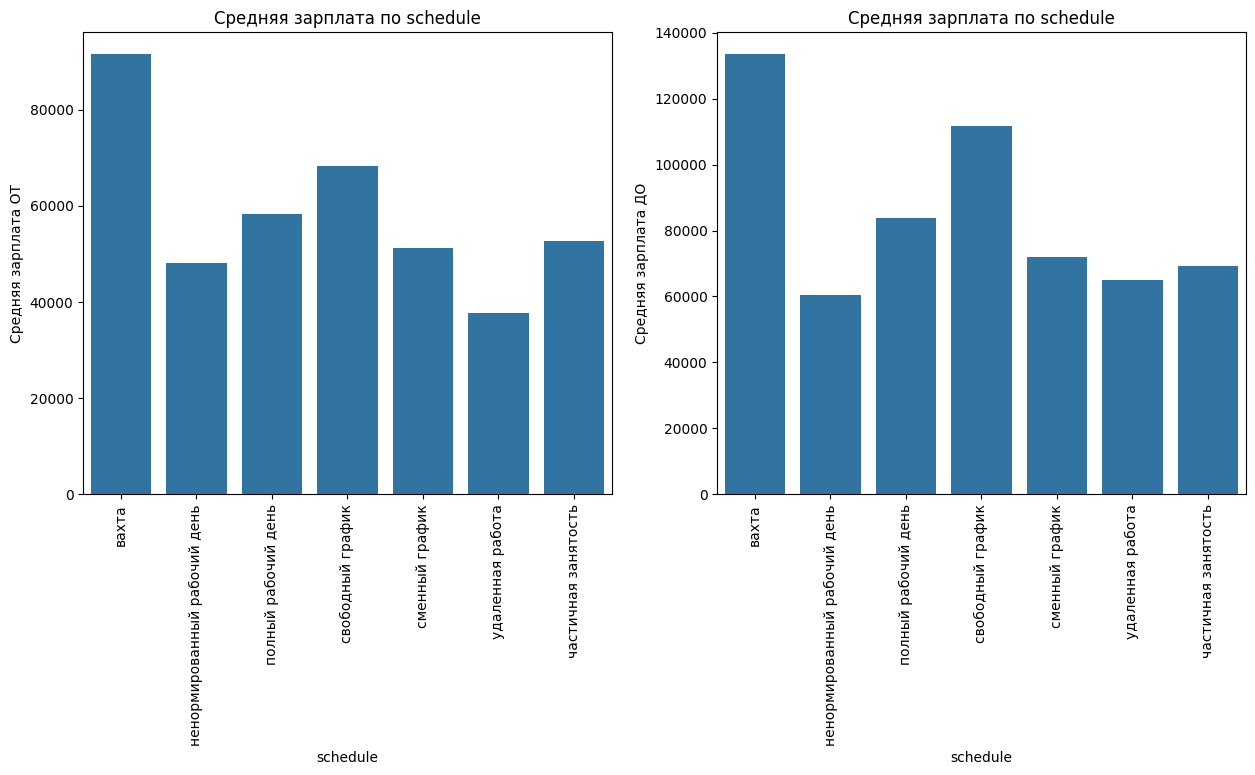

In [154]:
schedule_to = df.groupby('schedule')['salary_to'].mean()
schedule_from = df.groupby('schedule')['salary_from'].mean()

schedule = [str(item) for item in schedule_to.index.to_numpy()]
mean_salary_to = schedule_to.values
mean_salary_from = schedule_from.values

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=schedule, y=mean_salary_from, ax=ax[0])
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_xlabel('schedule', )
ax[0].set_ylabel('Средняя зарплата ОТ')
ax[0].set_title('Средняя зарплата по schedule')

sns.barplot(x=schedule, y=mean_salary_to, ax=ax[1])
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(schedule, rotation=90)
ax[1].set_xlabel('schedule')
ax[1].set_ylabel('Средняя зарплата ДО')
ax[1].set_title('Средняя зарплата по schedule')

plt.show()

Средняя зарплата по `education_name`

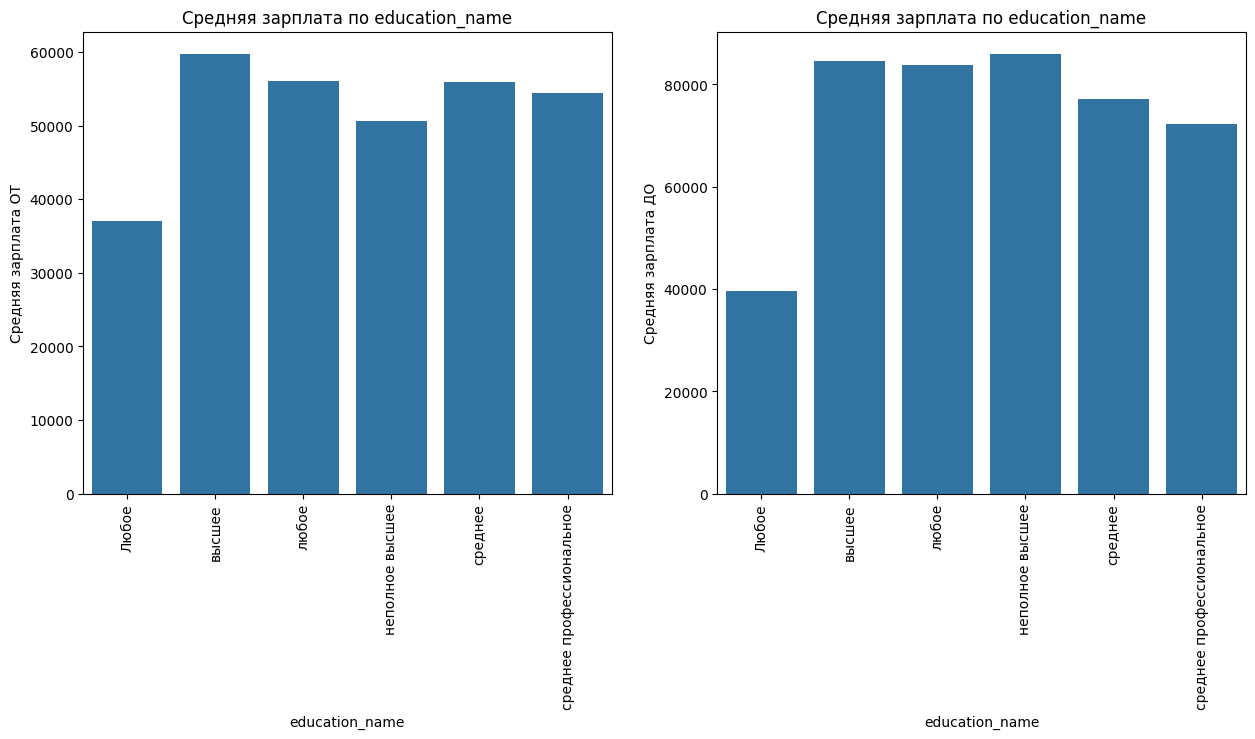

In [156]:
education_to = df.groupby('education_name')['salary_to'].mean()
education_from = df.groupby('education_name')['salary_from'].mean()

education_name = [str(item) for item in education_to.index.to_numpy()]
mean_salary_to = education_to.values
mean_salary_from = education_from.values

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=education_name, y=mean_salary_from, ax=ax[0])
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(education_name, rotation=90)
ax[0].set_xlabel('education_name')
ax[0].set_ylabel('Средняя зарплата ОТ')
ax[0].set_title('Средняя зарплата по education_name')

sns.barplot(x=education_name, y=mean_salary_to, ax=ax[1])
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(education_name, rotation=90)
ax[1].set_xlabel('education_name')
ax[1].set_ylabel('Средняя зарплата ДО')
ax[1].set_title('Средняя зарплата по education_name')

plt.show()

Распределение признаков `salary`

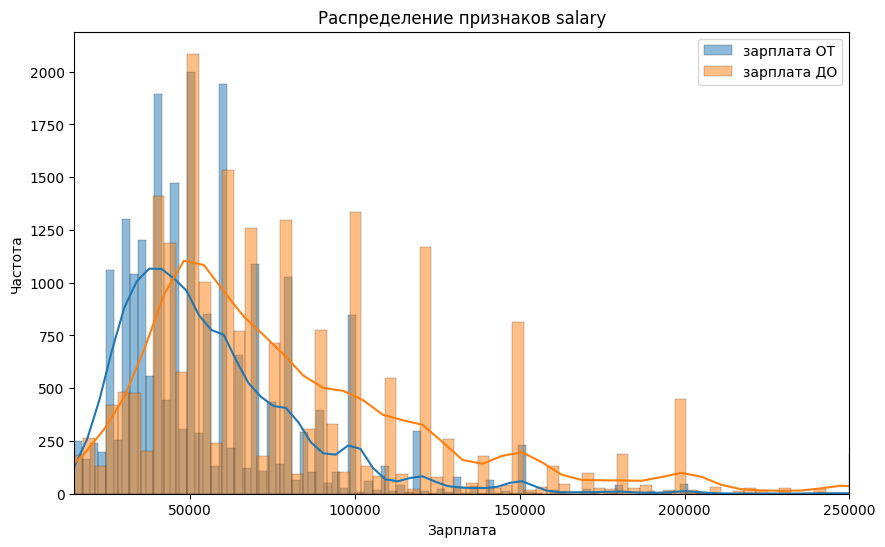

In [155]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='salary_from', kde=True, label='зарплата ОТ')
sns.histplot(data=df, x='salary_to', kde=True, label='зарплата ДО')

plt.xlabel('Зарплата')
plt.xlim(15000, 250000)
plt.ylabel('Частота')
plt.title('Распределение признаков salary')
plt.legend()

plt.show()